# Aula 5

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [101]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    '''
    Formata os dados para cada Milhão e mostra duas casas decimais depois da vírgula
    '''
    return "%.2f Mi" % (x/1E6)

In [102]:
mensal = pd.read_csv('https://raw.githubusercontent.com/Pedro-correa-almeida/Bootcamp_alura/main/Modulo_2/dados/dados_aula4', index_col=0, parse_dates=['data'])
mensal

,data,uf,gasto
0,2008-02-01,Rondônia,2931283.42
1,2008-03-01,Rondônia,1541682.52
2,2008-04-01,Rondônia,1525314.96
3,2008-05-01,Rondônia,1645953.84
4,2008-06-01,Rondônia,1406150.68
...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27
4262,2020-12-01,Distrito Federal,22991567.76
4263,2021-01-01,Distrito Federal,23527050.29
4264,2021-02-01,Distrito Federal,22766952.62


In [115]:
mensal[mensal['uf']=='Acre'].isna().sum()

data            0
uf              0
gasto           1
mes             0
ano             0
gasto_diario    1
mes_nome        0
dtype: int64

In [103]:
mensal['mes'] = mensal['data'].dt.month
mensal['ano'] = mensal['data'].dt.year
mensal

,data,uf,gasto,mes,ano
0,2008-02-01,Rondônia,2931283.42,2,2008
1,2008-03-01,Rondônia,1541682.52,3,2008
2,2008-04-01,Rondônia,1525314.96,4,2008
3,2008-05-01,Rondônia,1645953.84,5,2008
4,2008-06-01,Rondônia,1406150.68,6,2008
...,...,...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27,11,2020
4262,2020-12-01,Distrito Federal,22991567.76,12,2020
4263,2021-01-01,Distrito Federal,23527050.29,1,2021
4264,2021-02-01,Distrito Federal,22766952.62,2,2021


In [104]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [105]:
mensal['gasto_diario'] = mensal['gasto'] / mensal['mes'].map(dias_por_mes)
mensal

,data,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,Rondônia,2931283.42,2,2008,1.046887e+05
1,2008-03-01,Rondônia,1541682.52,3,2008,4.973169e+04
2,2008-04-01,Rondônia,1525314.96,4,2008,5.084383e+04
3,2008-05-01,Rondônia,1645953.84,5,2008,5.309529e+04
4,2008-06-01,Rondônia,1406150.68,6,2008,4.687169e+04
...,...,...,...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27,11,2020,6.819775e+05
4262,2020-12-01,Distrito Federal,22991567.76,12,2020,7.416635e+05
4263,2021-01-01,Distrito Federal,23527050.29,1,2021,7.589371e+05
4264,2021-02-01,Distrito Federal,22766952.62,2,2021,8.131055e+05


In [106]:
dict_mes = {
    1 : "Jan",
    2 : "Fev",
    3 : "Mar",
    4 : "Abr",
    5 : "Mai",
    6 : "Jun",
    7 : "Jul",
    8 : "Ago",
    9 : "Set",
    10 : "Out",
    11 : "Nov",
    12 : "Dez"
}

In [107]:
mensal['mes_nome'] = mensal['mes'].map(dict_mes)
mensal

,data,uf,gasto,mes,ano,gasto_diario,mes_nome
0,2008-02-01,Rondônia,2931283.42,2,2008,1.046887e+05,Fev
1,2008-03-01,Rondônia,1541682.52,3,2008,4.973169e+04,Mar
2,2008-04-01,Rondônia,1525314.96,4,2008,5.084383e+04,Abr
3,2008-05-01,Rondônia,1645953.84,5,2008,5.309529e+04,Mai
4,2008-06-01,Rondônia,1406150.68,6,2008,4.687169e+04,Jun
...,...,...,...,...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27,11,2020,6.819775e+05,Nov
4262,2020-12-01,Distrito Federal,22991567.76,12,2020,7.416635e+05,Dez
4263,2021-01-01,Distrito Federal,23527050.29,1,2021,7.589371e+05,Jan
4264,2021-02-01,Distrito Federal,22766952.62,2,2021,8.131055e+05,Fev


In [108]:
mensal_sp = mensal.query('uf == "São Paulo"')
mensal_sp

,data,uf,gasto,mes,ano,gasto_diario,mes_nome
3002,2008-02-01,São Paulo,1.486775e+08,2,2008,5.309912e+06,Fev
3003,2008-03-01,São Paulo,1.560873e+08,3,2008,5.035073e+06,Mar
3004,2008-04-01,São Paulo,1.612271e+08,4,2008,5.374238e+06,Abr
3005,2008-05-01,São Paulo,1.871194e+08,5,2008,6.036110e+06,Mai
3006,2008-06-01,São Paulo,1.872911e+08,6,2008,6.243038e+06,Jun
...,...,...,...,...,...,...,...
3155,2020-11-01,São Paulo,3.350849e+08,11,2020,1.116950e+07,Nov
3156,2020-12-01,São Paulo,3.304890e+08,12,2020,1.066094e+07,Dez
3157,2021-01-01,São Paulo,3.551495e+08,1,2021,1.145644e+07,Jan
3158,2021-02-01,São Paulo,3.488271e+08,2,2021,1.245811e+07,Fev


In [109]:
mensal['ano'] = mensal['ano'].astype('category')
mensal.dtypes

data            datetime64[ns]
uf                      object
gasto                  float64
mes                      int64
ano                   category
gasto_diario           float64
mes_nome                object
dtype: object

## Desafio 01: Melhorar o gráfico ano a ano

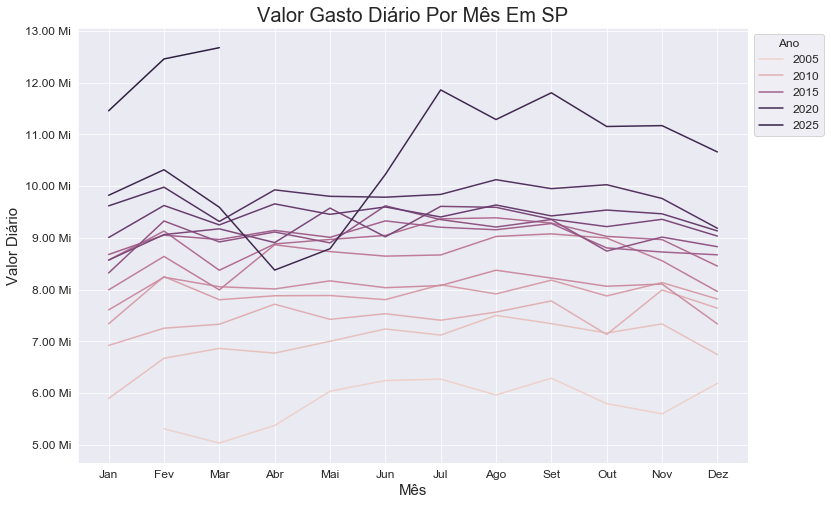

In [110]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando palheta
sns.set_palette(sns.color_palette('CMRmap_r',14))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.lineplot(x='mes', y='gasto_diario', hue='ano', data=mensal_sp)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Diário Por Mês Em SP', fontsize=20)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Valor Diário', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)
ax.yaxis.set_major_formatter(million_formatter)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Ano', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12)

#Mostrando o gráfico
plt.show()

## Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

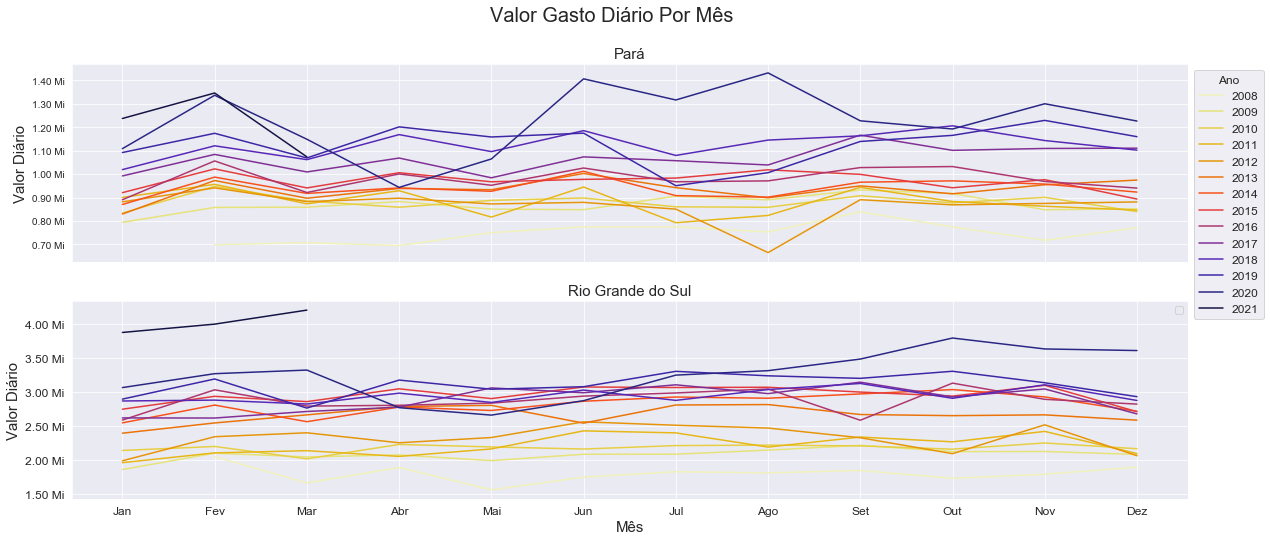

In [116]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando palheta
sns.set_palette(sns.color_palette('CMRmap_r',14))

#Criando figura e eixos
fig, ax = plt.subplots(2, 1, figsize=(20,8), sharex=True) 

#Criando o gráfico
sns.lineplot(x='mes', y='gasto_diario', hue='ano', data=mensal.query('uf == "Pará"'), ax=ax[0])
sns.lineplot(x='mes', y='gasto_diario', hue='ano', data=mensal.query('uf == "Rio Grande do Sul"'), ax=ax[1])

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Valor Gasto Diário Por Mês', fontsize=20)
ax[0].set_title('Pará', fontsize=15)
ax[1].set_title('Rio Grande do Sul', fontsize=15)
plt.xlabel('Mês', fontsize=15)
ax[0].set_ylabel('Valor Diário', fontsize=15)
ax[1].set_ylabel('Valor Diário', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)
ax[0].yaxis.set_major_formatter(million_formatter)
ax[1].yaxis.set_major_formatter(million_formatter)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles[1:], labels=labels[1:], title='Ano', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12)
ax[1].legend('')

#Mostrando o gráfico
plt.show()

Vou eliminar os dados de 2020 e 2021 por conta da pandemia para ter uma visão mais clara

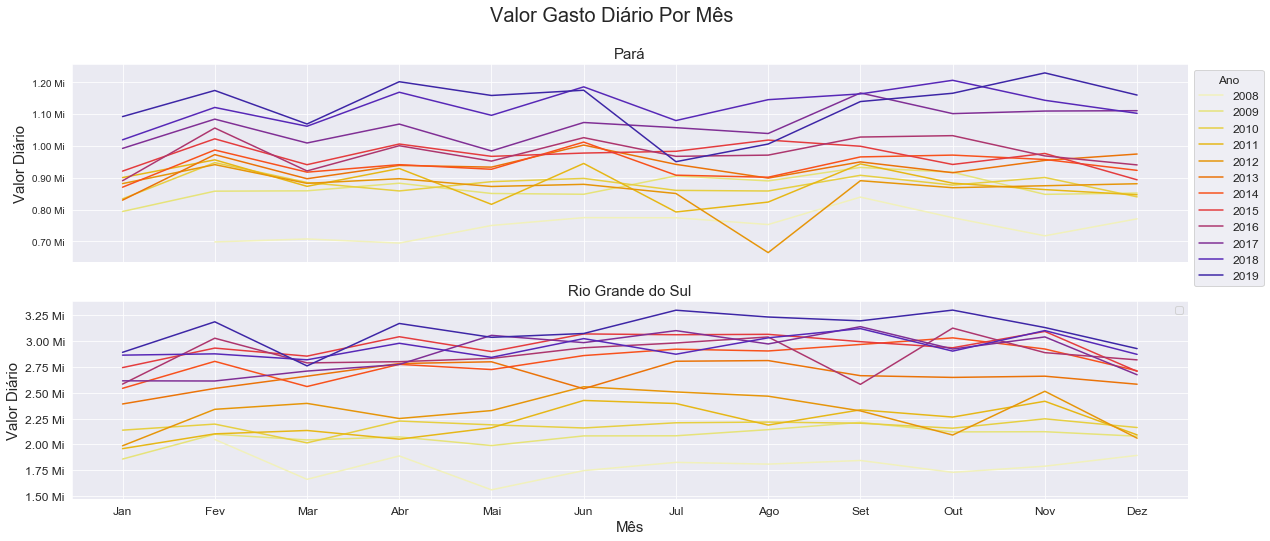

In [118]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando palheta
sns.set_palette(sns.color_palette('CMRmap_r',14))

#Criando figura e eixos
fig, ax = plt.subplots(2, 1, figsize=(20,8), sharex=True) 

#Criando o gráfico
sns.lineplot(x='mes', y='gasto_diario', hue='ano', data=mensal.query('uf == "Pará" and ano < 2020'), ax=ax[0])
sns.lineplot(x='mes', y='gasto_diario', hue='ano', data=mensal.query('uf == "Rio Grande do Sul" and ano < 2020'), ax=ax[1])

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Valor Gasto Diário Por Mês', fontsize=20)
ax[0].set_title('Pará', fontsize=15)
ax[1].set_title('Rio Grande do Sul', fontsize=15)
plt.xlabel('Mês', fontsize=15)
ax[0].set_ylabel('Valor Diário', fontsize=15)
ax[1].set_ylabel('Valor Diário', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)
ax[0].yaxis.set_major_formatter(million_formatter)
ax[1].yaxis.set_major_formatter(million_formatter)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles[1:], labels=labels[1:], title='Ano', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12)
ax[1].legend('')

#Mostrando o gráfico
plt.show()

A partir do gráfico nota se que no inverno na maioria dos anos o Pará sofre uma queda e no Rio Grande do Sul acontece o contrário, o gasto costuma subir nessa época de Julho e agosto.